In [2]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator 
from matplotlib.ticker import MultipleLocator 

In [24]:
# # Trial plot  
# x = np.linspace(-2.5,2.5)
# plt.plot(x,-x, linestyle='--', c='purple')
# plt.xlim(-3,3)
# plt.ylim(-3,3)

# # Plotting point A1 
# plt.text(1.2,2.2, '$A_1$', c='red')
# plt.plot(1,2, marker='x', color='red')

# # Plotting point B1
# plt.plot(-1,2, marker='x', color='blue')
# plt.text(-1.5,2.2, '$B_1$', c='blue')

# # Plotting point B2
# plt.plot(-1,0, marker='x', color='blue')
# plt.text(-1.5,-0.5, '$B_2$', c='blue')

# plt.axhline(0, color = "black") #x-axis
# plt.axvline(0, color = "black") #y-axis
# plt.ylabel('y-axis')
# plt.xlabel('x-axis')
# plt.grid()

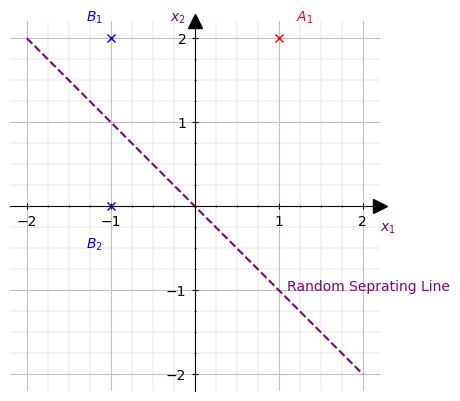

In [35]:
# FIGURE 2.2 

# Create array of value for x and plot line y=-x to pass through origin 
x = np.linspace(-2,2)
y = -x

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting Arbitary line y=-x 
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(1.1, -1, """Random Seprating Line""", color="purple")

        # Plotting point A1 
        ax.plot(1,2, marker='x', color='red')
        ax.text(1.2,2.2, '$A_1$', c='red')

        # Plotting point A1 
        ax.plot(-1,2, marker='x', color='blue')
        ax.text(-1.3,2.2, '$B_1$', c='blue')

        # Plotting point B2
        ax.plot(-1,0, marker='x', color='blue')
        ax.text(-1.3,-0.5, '$B_2$', c='blue')

        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        # Labelling the x and y axis 
        ax.text(-0.3,2.2,"$x_2$",color='purple')
        ax.text(2.2,-0.3,"$x_1$",color='purple')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)

        ax.yaxis.get_major_ticks()[3].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[3].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        plt.savefig('../CHAPTER_2/c2_fig_perceptron_example_2_python.eps', format='eps')

        plt.show()

In [127]:
def get_angle_plot(line1, line2, offset = 1, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    l1xy = line1.get_xydata()

    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - 0) / float(l1xy[1][0] - 0)
    angle1 = math.degrees(math.atan(slope1)) # Taking only the positive angle

    l2xy = line2.get_xydata()

    # Angle between line2 and x-axis
    slope2 = (l2xy[1][1] - 0) / float(l2xy[1][0] - 0)
    angle2 = math.degrees(math.atan(slope2))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    angle = theta2 - theta1

    print(angle1, angle2, theta1, theta2, angle)
    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")

In [128]:
def get_angle_text(angle_plot, anglelabel):
    #anglelabel =r'$\theta_{A_{1}}$' 
    #angle = angle_plot.get_label()[:-1] # Excluding the degree symbol
    #angle = "%0.2f"%float(angle)+u"\u00b0" # Display angle upto 2 decimal places

    # Get the vertices of the angle arc
    vertices = angle_plot.get_verts()

    # Get the midpoint of the arc extremes
    x_width = (vertices[0][0] + vertices[-1][0]) / 2.0
    y_width = (vertices[5][0] + vertices[6][-1]) / 2.0

    #print x_width, y_width

    separation_radius = max(x_width/2.0, y_width/2.0)

    return [ x_width + separation_radius, y_width + separation_radius, anglelabel] 


In [247]:
def circle(r,x):
    y = np.sqrt(np.abs(r - x**2))
    return y

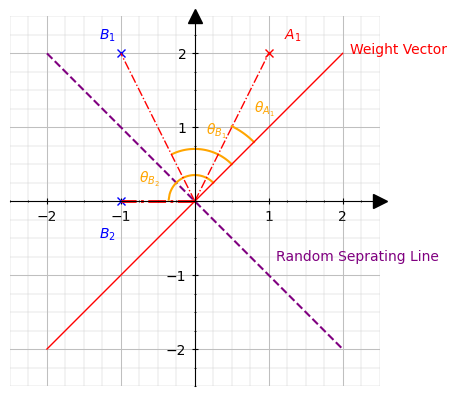

In [215]:
x = np.linspace(-2,2)
y = -x

x_angle_1 = np.linspace(0.5,0.8)
y_angle_1 = circle(1.28,x_angle_1)

x_angle_2 = np.linspace(-0.3,0.5)
y_angle_2 = circle(0.50,x_angle_2)

x_angle_3 = np.linspace(-0.353,0.25)
y_angle_3 = circle(0.125,x_angle_3)

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting point A1 
        ax.plot(1,2, marker='x', color='red')
        ax.text(1.2,2.2, '$A_1$', c='red')

        # Plotting point A1 
        ax.plot(-1,2, marker='x', color='blue')
        ax.text(-1.3,2.2, '$B_1$', c='blue')

        # Plotting point B2
        ax.plot(-1,0, marker='x', color='blue')
        ax.text(-1.3,-0.5, '$B_2$', c='blue')

        # Plotting Random separating y = -x & y = x 
        # Line y = x ---> Red line 
        # Line y = -x ---> Purple line 
        #ax.plot(x, y, color='purple', linestyle='-')
        #ax.plot(x, -y, color='purple', linestyle='--')
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(1.1, -0.8, """Random Seprating Line""", color="purple")

        ax.plot(x_angle_1, y_angle_1, color='orange', linestyle='-')
        ax.text(0.8, 1.2, r'$\theta_{A_{1}}$' , color="orange")

        ax.plot(x_angle_2, y_angle_2, color='orange', linestyle='-')
        ax.text(0.15, 0.9, r'$\theta_{B_{1}}$' , color="orange")


        ax.plot(x_angle_3, y_angle_3, color='orange', linestyle='-')
        ax.text(-0.75, 0.25, r'$\theta_{B_{2}}$' , color="orange")

        # Adding these lines as reference to draw the angle
        line_1 = Line2D([0,-1], [0,2], linewidth=1, linestyle = "dashdot", color="red")
        line_2 = Line2D([0,1], [0,2], linewidth=1, linestyle = "dashdot", color="red")
        line_3 = Line2D([-2,2], [-2,2], linewidth=1, linestyle = "-", color="red")
        ax.text(2.1, 2, "Weight Vector" , color="red")

        line_4 = Line2D([0,-1], [0,0], linewidth=2, linestyle = "dashdot", color="red")

        ax.add_line(line_1)
        ax.add_line(line_2)
        ax.add_line(line_3)
        ax.add_line(line_4)


        # Start draing angle arc between the two lines 
        #angle_plot = get_angle_plot(line_2, line_3, 1, color='blue')
       # angle_text = get_angle_text(angle_plot, r'$\theta_{A_{1}}$' )
        #ax.add_patch(angle_plot) # To display the angle arc
        #ax.text(*angle_text) # To display the angle value
        
        #angle_plot = get_angle_plot(line_3, line_1, 1, color="red") # Second angle arc will be red in color
        #angle_text = get_angle_text(angle_plot, r'$\theta_{B_{1}}$')

        #ax.add_patch(angle_plot) # To display the 2nd angle arc
        #ax.text(*angle_text) # To display the 2nd angle value

        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')




        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)
        
        

        ax.yaxis.get_major_ticks()[3].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[3].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        plt.savefig('../CHAPTER_2/c2_fig_perceptron_example_3_python.eps', format='eps')
        ax.set_xlim([-2.5, 2.5])
        ax.set_ylim([-2.5, 2.5])
        plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


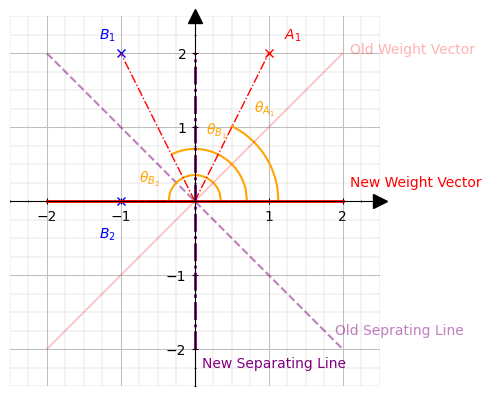

In [250]:
x = np.linspace(-2,2)
y = -x

x_angle_1 = np.linspace(0.5,np.sqrt(1.28))
y_angle_1 = circle(1.28,x_angle_1)

x_angle_2 = np.linspace(-0.3,np.sqrt(0.5))
y_angle_2 = circle(0.50,x_angle_2)

x_angle_3 = np.linspace(-np.sqrt(0.125),np.sqrt(0.125))
y_angle_3 = circle(0.125,x_angle_3)

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting point A1 
        ax.plot(1,2, marker='x', color='red')
        ax.text(1.2,2.2, '$A_1$', c='red')

        # Plotting point A1 
        ax.plot(-1,2, marker='x', color='blue')
        ax.text(-1.3,2.2, '$B_1$', c='blue')

        # Plotting point B2
        ax.plot(-1,0, marker='x', color='blue')
        ax.text(-1.3,-0.5, '$B_2$', c='blue')

        # Plotting Random separating y = -x & y = x 
        # Line y = x ---> Red line 
        # Line y = -x ---> Purple line 
        #ax.plot(x, y, color='purple', linestyle='-')
        #ax.plot(x, -y, color='purple', linestyle='--')
        ax.plot(x, y, color='purple', linestyle='--', alpha = 0.5)
        ax.text(1.9, -1.8, """Old Seprating Line""", color="purple", alpha = 0.5)

        ax.plot(x_angle_1, y_angle_1, color='orange', linestyle='-')
        ax.text(0.8, 1.2, r'$\theta_{A_{1}}$' , color="orange")

        ax.plot(x_angle_2, y_angle_2, color='orange', linestyle='-')
        ax.text(0.15, 0.9, r'$\theta_{B_{1}}$' , color="orange")


        ax.plot(x_angle_3, y_angle_3, color='orange', linestyle='-')
        ax.text(-0.75, 0.25, r'$\theta_{B_{2}}$' , color="orange")

        # Adding these lines as reference to draw the angle
        line_1 = Line2D([0,-1], [0,2], linewidth=1, linestyle = "dashdot", color="red")
        line_2 = Line2D([0,1], [0,2], linewidth=1, linestyle = "dashdot", color="red")
        line_3 = Line2D([-2,2], [-2,2], linewidth=1, linestyle = "-", color="red", alpha = 0.3)
        ax.text(2.1, 2, "Old Weight Vector" , color="red", alpha = 0.3)

        line_4 = Line2D([0,-1], [0,0], linewidth=2, linestyle = "dashdot", color="red")
        
        line_5 = Line2D([-2,2], [0,0], linewidth=2, linestyle = "-", color="red")
        ax.text(2.1, 0.2, "New Weight Vector" , color="red")

        line_6 = Line2D([0,0], [-2,2], linewidth=2, linestyle = "dashdot", color="purple")
        ax.text(0.1, -2.25, "New Separating Line" , color="purple")


        ax.add_line(line_1)
        ax.add_line(line_2)
        ax.add_line(line_3)
        ax.add_line(line_4)
        ax.add_line(line_5)
        ax.add_line(line_6)


        # Start draing angle arc between the two lines 
        #angle_plot = get_angle_plot(line_2, line_3, 1, color='blue')
       # angle_text = get_angle_text(angle_plot, r'$\theta_{A_{1}}$' )
        #ax.add_patch(angle_plot) # To display the angle arc
        #ax.text(*angle_text) # To display the angle value
        
        #angle_plot = get_angle_plot(line_3, line_1, 1, color="red") # Second angle arc will be red in color
        #angle_text = get_angle_text(angle_plot, r'$\theta_{B_{1}}$')

        #ax.add_patch(angle_plot) # To display the 2nd angle arc
        #ax.text(*angle_text) # To display the 2nd angle value

        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')




        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)
        
        

        ax.yaxis.get_major_ticks()[3].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[3].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        plt.savefig('../CHAPTER_2/c2_fig_perceptron_example_4_python.eps', format='eps')
        ax.set_xlim([-2.5, 2.5])
        ax.set_ylim([-2.5, 2.5])
        plt.show()

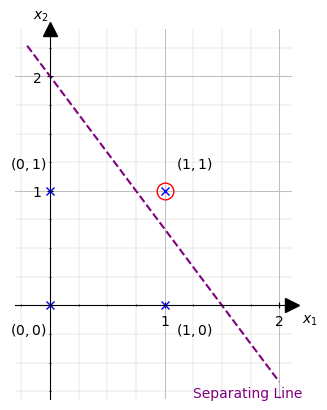

In [70]:
# FIGURE 2.5 ~ AND FUNCTION with Separating Line 

x = np.linspace(-0.2,2)
# Found the equation of line using the points (0,2) and (1.5,0) 
y = -(4/3)*x+2

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting Arbitary line y=-(4/3)*x+2 
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(1.25, -0.8, """Separating Line""", color="purple")

        # Plotting point (0,0)
        ax.plot(0,0, marker='x', color='blue')
        ax.text(-0.35,-0.25, '$(0,0)$')

        # Plotting (0,1)
        ax.plot(0,1, marker='x', color='blue')
        ax.text(-0.35,1.2, '$(0,1)$')

        # Plotting point (1,0) 
        ax.plot(1,0, marker='x', color='blue')
        ax.text(1.1,-0.25, '$(1,0)$')

        # Plotting (1,1)
        ax.plot(1,1, marker='x', color='blue')
        ax.plot(1,1, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(1.1,1.2, '$(1,1)$')

        ax.grid()
        
        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        # Labelling the x and y axis 
        ax.text(-0.15,2.5,"$x_2$",color='k')
        ax.text(2.2,-0.15,"$x_1$",color='k')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)

        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        plt.savefig('../CHAPTER_2/c2_fig_AND_function_python.eps', format='eps')
        #ax.set_xlim([-2, 2])
        #ax.set_ylim([-2, 2])

        plt.show()

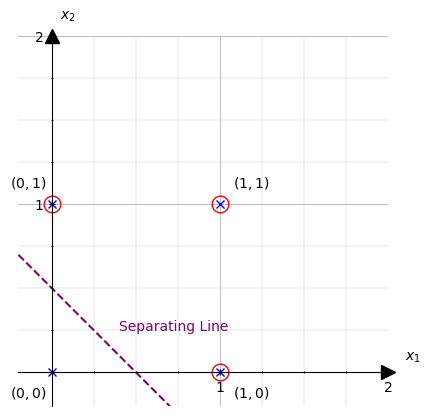

In [85]:
# FIGURE 2.6 ~ AND Function with Separating line 

x = np.linspace(-0.2,1.1)
# Found the equation of line using the points (0,0.5) and (0.5,0) 
y = -x+0.5

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting Arbitary line y=-x+0.5 
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(0.4, 0.25, "Separating Line", color="purple")

        # Plotting point (0,0)
        ax.plot(0,0, marker='x', color='blue')
        ax.text(-0.25,-0.15, '$(0,0)$')

        # Plotting (0,1) with red circle
        ax.plot(0,1, marker='x', color='blue') 
        ax.plot(0,1, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(-0.25,1.1, '$(0,1)$')

        # Plotting point (1,0) with red circle
        ax.plot(1,0, marker='x', color='blue')
        ax.plot(1,0, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(1.08,-0.15, '$(1,0)$')

        # Plotting (1,1) with red circle
        ax.plot(1,1, marker='x', color='blue')
        ax.plot(1,1, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(1.08,1.1, '$(1,1)$')

        ax.grid()
        
        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        # Labelling the x and y axis 
        ax.text(0.05,2.1,"$x_2$",color='k')
        ax.text(2.1,0.075,"$x_1$",color='k')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)
        
        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.set_xlim([-0.2, 2])
        ax.set_ylim([-0.2, 2])
        plt.gca().set_aspect("equal")
        plt.savefig('../CHAPTER_2/c2_fig_OR_function_python.eps', format='eps')
        

        plt.show()

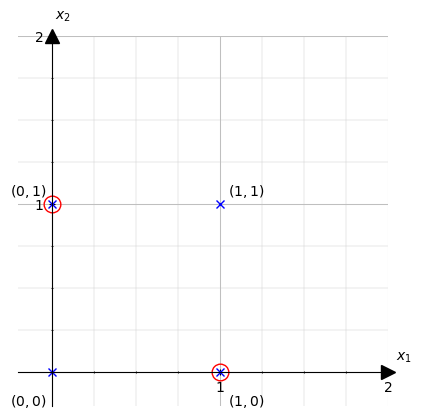

In [97]:
# FIGURE 2.7  ~ XOR FUNCTION

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting point (0,0)
        ax.plot(0,0, marker='x', color='blue')
        ax.text(-0.25,-0.2, '$(0,0)$')

        # Plotting point (0,1) with red circle 
        ax.plot(0,1, marker='x', color='blue')
        ax.plot(0,1, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(-0.25,1.05, '$(0,1)$')

        # Plotting point (1,0) with red circle 
        ax.plot(1,0, marker='x', color='blue')
        ax.plot(1,0, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(1.05,-0.2, '$(1,0)$')

        # Plotting point (1,1)
        ax.plot(1,1, marker='x', color='blue')
        ax.text(1.05,1.05, '$(1,1)$')
        
        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        # Labelling the x and y axis 
        ax.text(0.02,2.1,"$x_2$",color='k')
        ax.text(2.05,0.075,"$x_1$",color='k')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)

        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        ax.set_xlim([-0.2, 2])
        ax.set_ylim([-0.2, 2])
        plt.savefig('../CHAPTER_2/c2_rig_XOR_python.eps', format='eps')

        plt.show()

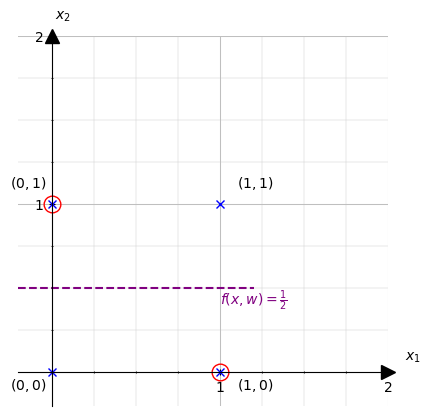

In [96]:
# FIGURE 2.8 ~ XOR Approximate Solution 

# Generate values for x with linspace range and constant value for y = 0.5 
x = np.linspace(-0.2,1.2)
y = [0.5 for _ in range(len(x))]

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting Horizontal line f(x,w)=1/2 
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(1, 0.4, r"$f (x,w)=\frac{1}{2}$", color="purple")

        # Plotting point (0,0)
        ax.plot(0,0, marker='x', color='blue')
        ax.text(-0.25,-0.1, '$(0,0)$')

        # Plotting point (0,1) with red circle 
        ax.plot(0,1, marker='x', color='blue')
        ax.plot(0,1, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(-0.25,1.1, '$(0,1)$')

        # Plotting point (1,0) with red circle 
        ax.plot(1,0, marker='x', color='blue')
        ax.plot(1,0, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(1.1,-0.1, '$(1,0)$')

        # Plotting point (1,1)
        ax.plot(1,1, marker='x', color='blue')
        ax.text(1.1,1.1, '$(1,1)$')
        
        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
         # Labelling the x and y axis 
        ax.text(0.02,2.1,"$x_2$",color='k')
        ax.text(2.1,0.075,"$x_1$",color='k')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)
        
        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        ax.set_xlim([-0.2, 2])
        ax.set_ylim([-0.2, 2])
        plt.savefig('../CHAPTER_2/c2_fig_XOR_soln_python.eps', format='eps')

        plt.show()

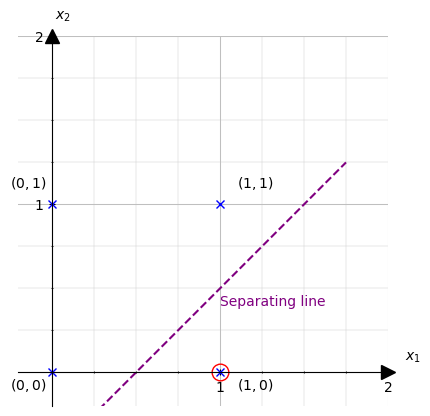

In [103]:
# FIGURE 2.9 ~ f1 

x = np.linspace(-0.2,1.75)
# Found the equation of line using the points (0.5,0) and (1,0.5) 
y = x - 0.5

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting Arbitary line y = x - 0.5 
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(1, 0.4, r"Separating line", color="purple")

        # Plotting point (0,0)
        ax.plot(0,0, marker='x', color='blue')
        ax.text(-0.25,-0.1, '$(0,0)$')

        # Plotting point (0,1)
        ax.plot(0,1, marker='x', color='blue')
        ax.text(-0.25,1.1, '$(0,1)$')

        # Plotting point (1,0) with red circle 
        ax.plot(1,0, marker='x', color='blue')
        ax.plot(1,0, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(1.1,-0.1, '$(1,0)$')

        # Plotting point (1,1)
        ax.plot(1,1, marker='x', color='blue')
        ax.text(1.1,1.1, '$(1,1)$')
        
        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        # Labelling the x and y axis 
        ax.text(0.02,2.1,"$x_2$",color='k')
        ax.text(2.1,0.075,"$x_1$",color='k')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
        
        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)

        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        ax.set_xlim([-0.2, 2])
        ax.set_ylim([-0.2, 2])
        plt.savefig('../CHAPTER_2/c2_fig_f_1_XOR_python.eps', format='eps')

        plt.show()

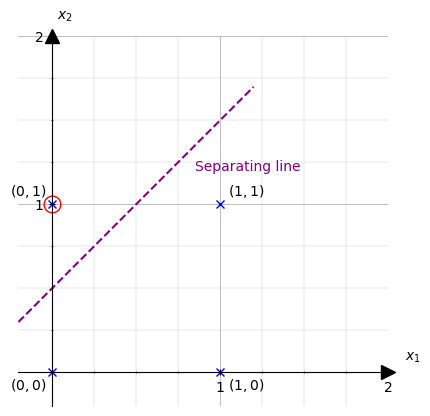

In [111]:
# FIGURE 2.10 ~ f1 

x = np.linspace(-0.2,1.2)
# Found the equation of line using the points (0,0.5) and (1,1.5) 
y = x + 0.5

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting Arbitary line y = x + 0.5 
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(0.85, 1.2, "Separating line", color="purple")

        # Plotting point (0,0)
        ax.plot(0,0, marker='x', color='blue')
        ax.text(-0.25,-0.1, '$(0,0)$')

        # Plotting point (0,1) with red circle 
        ax.plot(0,1, marker='x', color='blue')
        ax.plot(0,1, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(-0.25,1.05, '$(0,1)$')

        # Plotting point (1,0) 
        ax.plot(1,0, marker='x', color='blue')
        ax.text(1.05,-0.1, '$(1,0)$')

        # Plotting point (1,1)
        ax.plot(1,1, marker='x', color='blue')
        ax.text(1.05,1.05, '$(1,1)$')
        
        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
       # Labelling the x and y axis 
        ax.text(0.03,2.1,"$x_2$",color='k')
        ax.text(2.1,0.075,"$x_1$",color='k')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)

        

        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        ax.set_xlim([-0.2, 2])
        ax.set_ylim([-0.2, 2])
        plt.savefig('../CHAPTER_2/c2_fig_f_2_XOR_python.eps', format='eps')

        plt.show()

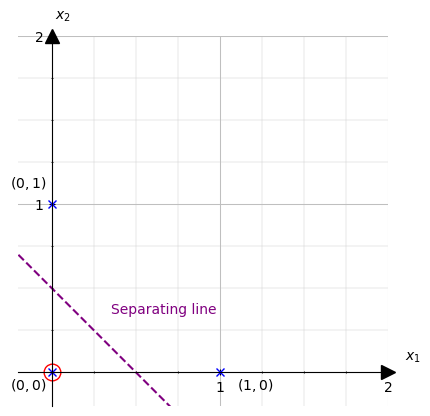

In [119]:
# FIGURE 2.12 ~ XOR Layer

x = np.linspace(-0.2,1.2)
# Found the equation of line using the points (0,0.5) and (0.5,0) 
y = -x + 0.5

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting Arbitary line y = -x + 0.5 
        ax.plot(x, y, color='purple', linestyle='--')
        ax.text(0.35, 0.35, "Separating line", color="purple")

        # Plotting point (0,0)
        ax.plot(0,0, marker='x', color='blue')
        ax.plot(0,0, marker='o', color='red', fillstyle='none', markersize=12)
        ax.text(-0.25,-0.1, '$(0,0)$')

        # Plotting (0,1)
        ax.plot(0,1, marker='x', color='blue')
        ax.text(-0.25,1.1, '$(0,1)$')

        # Plotting point (1,0) 
        ax.plot(1,0, marker='x', color='blue')
        ax.text(1.1,-0.1, '$(1,0)$')

        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        # Labelling the x and y axis 
        ax.text(0.02,2.1,"$x_2$",color='k')
        ax.text(2.1,0.075,"$x_1$",color='k')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)

        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        ax.set_xlim([-0.2, 2])
        ax.set_ylim([-0.2, 2])
        plt.savefig('../CHAPTER_2/c2_fig_XOR_sep_python.eps', format='eps')

        plt.show()

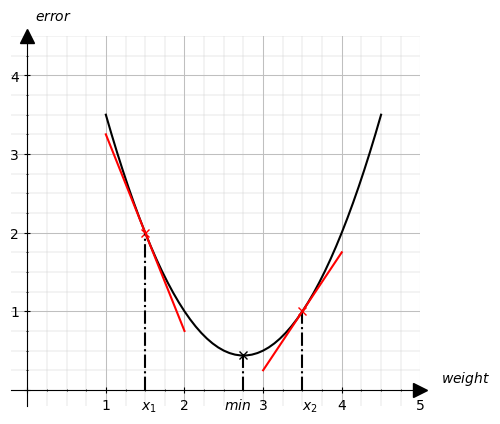

In [255]:
# FIGURE 3.2 ~ NETWORK ERROR
# Found the equation of the curve x^2-5.5x+8 (Through Desmos lol)
x = np.linspace(1,4.5)
y_curve = x**2 -5.5*x +8 

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

with plt.rc_context(rc):
        fig, ax = plt.subplots()

        # Plotting the curve y = x^2 - 5.5x + 8 
        ax.plot(x, y_curve, color='black', linestyle='-')
        # Plot minimum point --> (2.75, 0.438)
        # Define Vertical Line with y varying till 0.438 and x = 2.75 fixed 
        ax.plot(2.75,0.438, marker='x', c='black')
        y_min = np.linspace(0,0.438)
        x_min = [2.75 for _ in range(len(y_min))]
        ax.plot(x_min, y_min, linestyle='dashdot', color='black')

        # dy/dx = 2x - 5.5 
        # Using point Point (1.5, 2) and gradient = -2.5
        # plotting line 1: y=-2.5x+5.75 
        ax.plot(1.5,2, marker='x', color='red')
        y_vert1 = np.linspace(0,2)
        x_vert1 = [1.5 for _ in range(len(y_vert1))]
        ax.plot(x_vert1, y_vert1, linestyle='dashdot', color='black')
        x_line1 = np.linspace(1,2)
        y_line1 = -2.5*x_line1+5.75 
        ax.plot(x_line1, y_line1, c="red")

        # dy/dx = 2x - 5.5 
        # Using point Point (3.5, 1) and gradient = 1.5
        # plotting line 2: y = 1.5x - 4.25 
        ax.plot(3.5,1, marker='x', color='red')
        y_vert2 = np.linspace(0,1)
        x_vert2 = [3.5 for _ in range(len(y_vert1))]
        ax.plot(x_vert2, y_vert2, linestyle='dashdot', color='black')
        x_line2 = np.linspace(3,4)
        y_line2 = 1.5*x_line2-4.25 
        ax.plot(x_line2, y_line2, c="red")

        # Set the x-axis and y-axis in place 
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
        # Labelling axes --> x-axis and y-axis 
        ax.text(0.1,4.7,"$error$",color='k')
        ax.text(5.26,0.1,"$weight$",color='k')

        # Labelling other points 
        # Labelling x1, minimum, x2, error points 
        ax.text(1.45,-0.25, "$x_1$")
        ax.text(2.5, -0.25, "$min$")
        ax.text(3.5, -0.25, "$x_2$")
        #ax.text(4.5, 3.3, '$error$')

        # Force X and Y axis tick values to be integers instead of float 
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Define the grid for the plot 
        # Major line indicated by the thicker lines with interval of 1 
        # Minor line indicated by the thinner lines with internal 0.25 (hence 4 squares before 1)
        ax.xaxis.set_major_locator(MultipleLocator(1.0))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(1.0))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)

        ax.yaxis.get_major_ticks()[1].label1.set_visible(False)
        ax.xaxis.get_major_ticks()[1].label1.set_visible(False)
        plt.gca().set_aspect("equal")
        ax.set_xlim([-0.2, 5])
        ax.set_ylim([-0.2, 4.5])
        plt.savefig('../CHAPTER_2/c2_fig_network_error_python.eps', format='eps')

        plt.show()